In [1]:
import sys
import os
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../src/')

In [2]:
stocks_folderpath = '../../../Datasets/Stock Market Dataset/stocks/'
etfs_folderpath = '../../../Datasets/Stock Market Dataset/etfs/'

In [3]:
n_assets = 10
stock_files = [os.path.join(stocks_folderpath, filename) for filename in os.listdir(stocks_folderpath)[0:n_assets]]
etf_files = [os.path.join(etfs_folderpath, filename) for filename in os.listdir(etfs_folderpath)[0:n_assets]]

In [4]:
def read_files(files_pathlist):
    assets_dict = {}
    for filepath in files_pathlist:
        df = pd.read_csv(filepath)
        df.index = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d')).values
        assets_dict[filepath.split('/')[-1].split('.')[0]] = df
    return assets_dict

In [5]:
df_stocks = read_files(stock_files)
df_etfs = read_files(etf_files)

In [6]:
def plot_stocks_timeline(assets_dict, subplotsize=(10, 6)):
    plt.figure(figsize=(subplotsize[0], subplotsize[1]*len(assets_dict)))
    for i, (asset_name, df) in enumerate(assets_dict.items()):
        plt.subplot(len(assets_dict), 1, i+1)
        plt.plot(df.index, df['Close'].values, label=asset_name, alpha=0.75)
        if len(assets_dict) <= 10:
            plt.legend(loc='best')
        plt.ylabel('Asset value [$]')
    plt.tight_layout()
    plt.show()

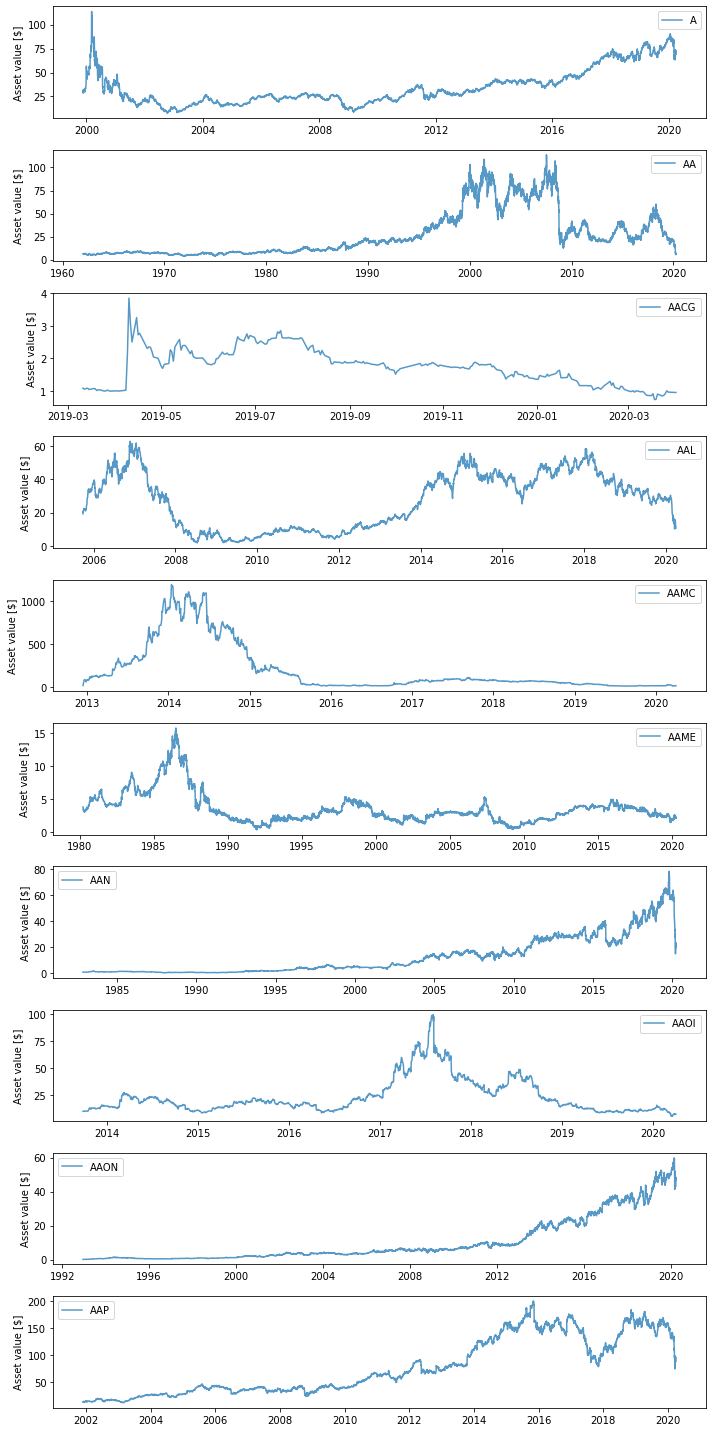

In [7]:
plot_stocks_timeline(df_stocks, subplotsize=(10, 2))

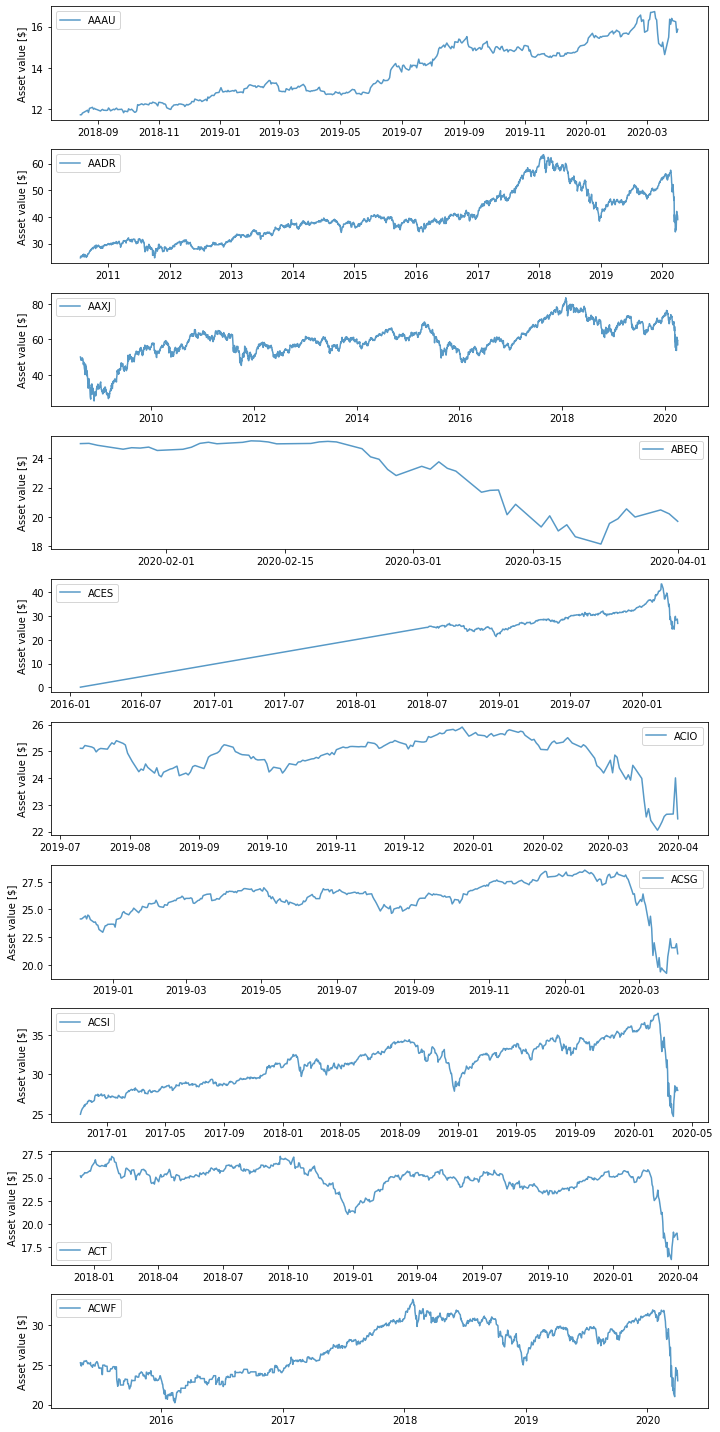

In [8]:
plot_stocks_timeline(df_etfs, subplotsize=(10, 2))